In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
project_path = '/content/drive/MyDrive/ML_Artivatic_dataset.zip (Unzipped Files)/ML_Artivatic_dataset/'
df = pd.read_csv(project_path + 'train_indessa.csv')
 

In [9]:
# Class Label : Binary Classification
train_target = pd.DataFrame(df['loan_status']) 

In [10]:
df.head() 

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [11]:
df['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [12]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [13]:
# Replaces months string with '' 
df['term'].replace(to_replace=' months', value='', regex=True, inplace=True) 

# Convert it to numeric
df['term'] = pd.to_numeric(df['term'], errors='coerce')

In [14]:
df['term'].value_counts() 

36    372793
60    159635
Name: term, dtype: int64

In [15]:
df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

# Convert it to numeric
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce') 

In [16]:
df['emp_length'].value_counts()

10.0    175105
2.0      47276
0.0      42253
3.0      42175
1.0      34202
5.0      33393
4.0      31581
7.0      26680
8.0      26443
6.0      25741
9.0      20688
Name: emp_length, dtype: int64

In [17]:
df['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True) 

# Convert it to numeric
df['sub_grade'] = pd.to_numeric(df['sub_grade'], errors='coerce')

In [18]:
df['sub_grade'].value_counts() 

13    33844
14    33198
21    31975
22    31356
23    30080
12    29390
15    29313
24    29103
5     27016
11    26968
25    24985
31    21712
4     20823
32    17991
33    15771
34    15226
3     14082
1     13653
2     13533
35    12867
41    10928
42    10255
43     8488
44     7051
45     5773
51     4350
52     3196
53     2708
54     2056
55     1516
61     1112
62      824
63      559
64      391
65      335
Name: sub_grade, dtype: int64

In [19]:
df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)

df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

# Convert it to numeric
df['last_week_pay'] = pd.to_numeric(df['last_week_pay'], errors='coerce')

In [20]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [21]:
columns = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade',
           'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
           'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 
           'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in columns:
    df[col].fillna(df[col].median(), inplace=True)  # Filling NaN values with median of each column present in columns.

  
num_cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in num_cols:
    df[col].fillna(0, inplace=True)        ## Filling NaN values with 0 for each column present in columns.

In [22]:
# Converts categorical variable into dummy/indicator variables.
cate_attr = ['home_ownership', 'purpose']
for cat in cate_attr:
   df_col = [cat]
   df[cat] = df[cat].astype("category")
   df[cat] = pd.get_dummies(df, columns=df_col) 

In [24]:
data = df.copy()
data= data.drop(['loan_status'], axis=1) 

In [25]:
import math
import numpy as np

# How big the loan a person has taken with respect to his earnings, annual income to fund by bank ratio
data['income_to_loan'] = np.round_(data['annual_inc']/data['funded_amnt'], decimals = 2)

# How big the loan a person has taken with respect to his earnings, annual income to fund by investors ratio
data['income_to_loan_inv'] = np.round_(data['annual_inc']/data['funded_amnt_inv'], decimals = 2)


# Interest paid so far = interest received till date + Late fee received till date
data['total_int_paid'] = data['total_rec_int'] + data['total_rec_late_fee']

# Calculating EMIs (monthly)
#EMI = [P x R x (1+R)^N] / [(1+R)^N-1]
principal = data['loan_amnt']
rate = data['int_rate'] /(100*12)
time = data['term']

data['emi_per_month'] = np.round_((principal * rate * (1+rate)**time)/((1+rate)**(time)-1), decimals = 2)

# Calculating EMIs paid (in terms of percent) np.round_(in_array, decimals = 2)
data['emi_paid_perc'] = np.round_(((data['last_week_pay'])/(data['term']/12*52+1))*100, decimals = 2)

In [26]:
data.shape

(532428, 49)

In [27]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
cols = ['grade', 'emp_title', 'verification_status_joint', 'verification_status',
        'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type']

for col in cols:
    data[col].fillna('missing', inplace=True)

In [30]:
data.fillna(0)  
data.reset_index(inplace=True) 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

x_tfidf = v.fit_transform(data['grade'])   # Create a feature matrix using TFIDF.

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names())

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([data, df_tfidf], axis=1)

# Finally, we drop the 'grade' feature as we have a more dimensional feature matrix.
res_train.drop('grade',axis=1,inplace=True)

print(res_train.shape)

(532428, 6)
(532428, 55)


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['verification_status'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'verification_status' feature as we have a more dimensional feature matrix.
res_train.drop('verification_status',axis=1,inplace=True)

print(res_train.shape)

(532428, 3)
(532428, 57)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['verification_status_joint'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'verification_status_joint' feature as we have a more dimensional feature matrix.
res_train.drop('verification_status_joint',axis=1,inplace=True)

print(res_train.shape)

(532428, 4)
(532428, 60)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['pymnt_plan'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'pymnt_plan' feature as we have a more dimensional feature matrix.
res_train.drop('pymnt_plan',axis=1,inplace=True)

print(res_train.shape)

(532428, 2)
(532428, 61)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['addr_state'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'addr_state' feature as we have a more dimensional feature matrix.
res_train.drop('addr_state',axis=1,inplace=True)

print(res_train.shape)

(532428, 46)
(532428, 106)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['initial_list_status'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'initial_list_status' feature as we have a more dimensional feature matrix.
res_train.drop('initial_list_status',axis=1,inplace=True) 

print(res_train.shape)

(532428, 2)
(532428, 107)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(min_df=3,  max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', 
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = 'english')

# Create a feature matrix using TFIDF
x_tfidf = v.fit_transform(res_train['application_type'])  # We'll use the previous concatenated dataframe here  

print(x_tfidf.shape)    # No.of columns represents the number of features made by TFIDF.

# Convert the feature matrix to an array and store it a pandas dataframe.
df_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=v.get_feature_names() )

# Concatenate the array dataframe and our final dataframe.
res_train = pd.concat([res_train, df_tfidf], axis=1)

# Finally, we drop the 'application_type' feature as we have a more dimensional feature matrix.
res_train.drop('application_type',axis=1,inplace=True) 

print(res_train.shape)

(532428, 2)
(532428, 108)


In [38]:
res_train.drop(['desc', 'zip_code', 'emp_title', 'title', 'batch_enrolled'], axis=1, inplace=True)

In [39]:
res_train.shape

(532428, 103)

In [40]:
def scaler():
    result = res_train.copy()
    for feature_name in res_train.columns:
        max_value = res_train[feature_name].max()
        min_value = res_train[feature_name].min()
        result[feature_name] = (res_train[feature_name] - min_value) / (max_value - min_value)
    return result 

In [41]:
res_train_scaled = scaler() 

In [42]:
#  Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(res_train_scaled), np.array(train_target), test_size=0.30) 

In [43]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((372699, 103), (372699, 1), (159729, 103), (159729, 1))

In [44]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import roc_auc_score

In [50]:
pip install catboost

     |████████████████████████████████| 67.3MB 43kB/s 


In [52]:
#CATBoost classifier
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(learning_rate=0.1, n_estimators=1400, subsample=0.70, max_depth=6, scale_pos_weight=2.5, silent=True)
cat_clf.fit(X_train, y_train)

# evaluate predictions
y_train_predict_cat = cat_clf.predict(X_train)
print("==========================")
print('Train Accuracy: %.3f' % metrics.accuracy_score(y_train, y_train_predict_cat))

# make predictions for test data
y_pred_cat = cat_clf.predict(X_test)
predictions = [round(value) for value in y_pred_cat]


accuracy_per_roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))

print('Test Accuracy: %.3f' % metrics.accuracy_score(y_test, predictions))
print("==========================")
print(metrics.confusion_matrix(y_test, predictions))
print("==========================")
print(metrics.classification_report(y_test, predictions))
print("==========================")
print('Precision Score: %.3f' % metrics.precision_score(y_test, predictions))
print('Recall Score: %.3f' % metrics.recall_score(y_test, predictions))
print('F1 Score: %.3f' % metrics.f1_score(y_test, predictions)) 

Train Accuracy: 0.944
ROC-AUC: 93.3991595778%
Test Accuracy: 0.939
[[114909   6949]
 [  2840  35031]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96    121858
           1       0.83      0.93      0.88     37871

    accuracy                           0.94    159729
   macro avg       0.91      0.93      0.92    159729
weighted avg       0.94      0.94      0.94    159729

Precision Score: 0.834
Recall Score: 0.925
F1 Score: 0.877


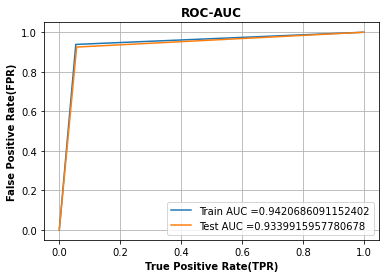

In [53]:
y_train_pred = cat_clf.predict(X_train)    
y_test_pred = cat_clf.predict(X_test)


train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)", fontweight='bold')
plt.ylabel("False Positive Rate(FPR)", fontweight='bold')
plt.title("ROC-AUC", fontweight='bold')
plt.grid()
plt.show() 

In [60]:
print ("Catboost classifier")
print ("ROC_AUC accuracy is 93.39%") 
print("TEST accuracy is 93.9% ")

Catboost classifier
ROC_AUC accuracy is 93.39%
TEST accuracy is 93.9% 


In [54]:
#LGBM Light Gradient Boosting Machine
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective ="binary",verbosity = -1, learning_rate=0.1, n_estimators=1000, scale_pos_weight=2.5)
    
lgbm.fit(X_train, y_train)


# evaluate predictions
y_train_predict_lgbm = lgbm.predict(X_train)

print("==========================")
print('Train Accuracy %.3f' % metrics.accuracy_score(y_train, y_train_predict_lgbm))

# make predictions for test data
y_pred_lgbm = lgbm.predict(X_test)
predictions = [round(value) for value in y_pred_lgbm]


accuracy_per_roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))


print('Test Accuracy %.3f' % metrics.accuracy_score(y_test, predictions))
print("==========================")
print(metrics.confusion_matrix(y_test, predictions))
print("==========================")
print(metrics.classification_report(y_test, predictions))
print("==========================")
print('Precision Score %.3f' % metrics.precision_score(y_test, predictions))
print('Recall Score %.3f' % metrics.recall_score(y_test, predictions))
print('F1 Score %.3f' % metrics.f1_score(y_test, predictions)) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy 0.950
ROC-AUC: 93.2673777046%
Test Accuracy 0.939
[[115019   6839]
 [  2974  34897]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96    121858
           1       0.84      0.92      0.88     37871

    accuracy                           0.94    159729
   macro avg       0.91      0.93      0.92    159729
weighted avg       0.94      0.94      0.94    159729

Precision Score 0.836
Recall Score 0.921
F1 Score 0.877


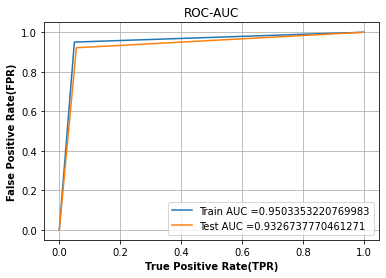

In [55]:
y_train_pred = lgbm.predict(X_train)    
y_test_pred = lgbm.predict(X_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)", fontweight='bold')
plt.ylabel("False Positive Rate(FPR)", fontweight='bold')
plt.title("ROC-AUC")
plt.grid()
plt.show()  

In [61]:
print ("LGBTM classifier")
print ("ROC_AUC accuracy is 93.26%") 
print("TEST accuracy is 93.9% ")

LGBTM classifier
ROC_AUC accuracy is 93.26%
TEST accuracy is 93.9% 


In [ ]:
CATBOOST classifier the model gave the heighest accuracy